In [180]:
import pyodbc as pyodbc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

DB_SERVER = '172.25.0.124'
DB_PORT = '60388'
DB_NAME = 'TOAT'
DB_USER = 'uniconuser01'
DB_PASSWORD = '87654321'

connStr = ('DRIVER={ODBC Driver 17 for SQL Server};Server=%s,%s;port=%s;Database=%s;uid=%s;pwd=%s') \
         % (DB_SERVER, DB_PORT, DB_PORT, DB_NAME, DB_USER, DB_PASSWORD)
print(connStr)
cnxn = pyodbc.connect(connStr)
cursor = cnxn.cursor()
print(cnxn, cursor)
print(cursor.execute("SELECT @@SPID").fetchone())

DRIVER={ODBC Driver 17 for SQL Server};Server=172.25.0.124,60388;port=60388;Database=TOAT;uid=uniconuser01;pwd=87654321
<pyodbc.Connection object at 0x7fc7e2d53ed0> <pyodbc.Cursor object at 0x7fc7e22477b0>
(73, )


In [181]:
import textwrap
sql = textwrap.dedent("""
SELECT LEFT(CONVERT(varchar, [log_date_short],112),6) as MES,
	   tip AS PLATAFORMA,
	   SUM([num_gui_export]) AS DESCARGAS
FROM [TOAT].[dbo].[tmp_proxy_certificado_log] (nolock)
WHERE 1=1
	AND seg IS NOT NULL
	AND coObr IS NOT NULL
	AND fun = 'EXPORT'
	AND log_date_short >= '2018-04-01' AND log_date_short < '2018-07-01'
	--AND tip = 'WEB'
group by LEFT(CONVERT(varchar, [log_date_short],112),6), tip
ORDER BY LEFT(CONVERT(varchar, [log_date_short],112),6), tip
""")

In [184]:
df = pd.read_sql(sql, cnxn)
df.head(6)

MES PLATAFORMA  DESCARGAS
0  201804      MOVIL       1866
1  201804        WEB       6332
2  201805      MOVIL        929
3  201805        WEB       8363
4  201806      MOVIL        938
5  201806        WEB       6311

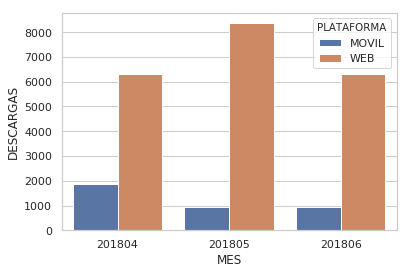

In [176]:
sns.set(style="whitegrid")
ax = sns.barplot(x="MES", y="DESCARGAS", hue="PLATAFORMA", data=df)

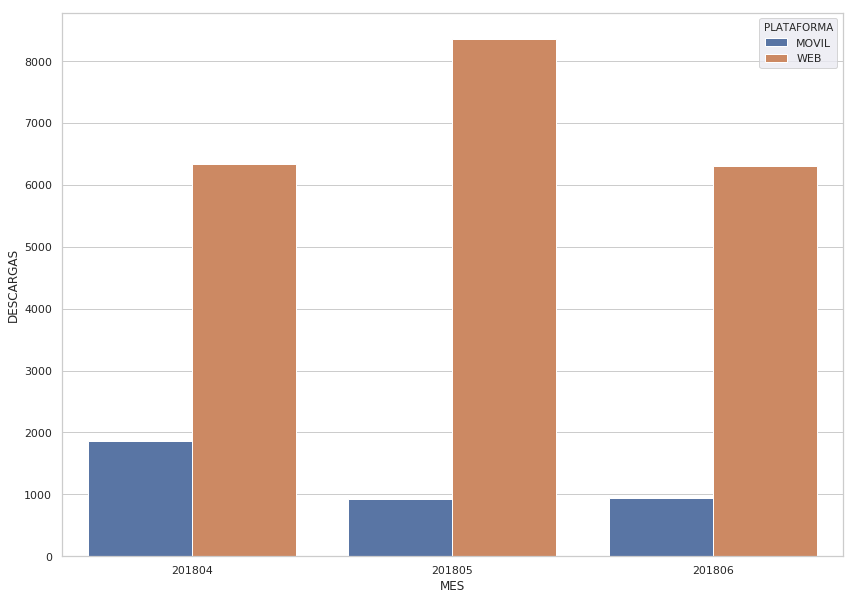

In [177]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.set(font_scale=1)
ax1 = sns.barplot(x="MES", y="DESCARGAS", hue="PLATAFORMA", data=df)
#for index, row in df.iterrows():
   # ax1.text(row.name, row.DESCARGAS, round(row.DESCARGAS,2), color='black', ha="center")
    # print(row.name, row.DESCARGAS, round(row.DESCARGAS,2))
# plt.show()

## https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values

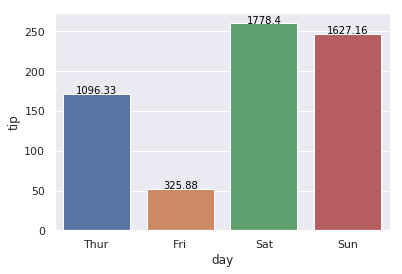

In [125]:
import pandas as pd
import seaborn as sns
%matplotlib inline
df = sns.load_dataset("tips")
groupedvalues=df.groupby('day').sum().reset_index()
g=sns.barplot(x='day',y='tip',data=groupedvalues)
for index, row in groupedvalues.iterrows():
    g.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")

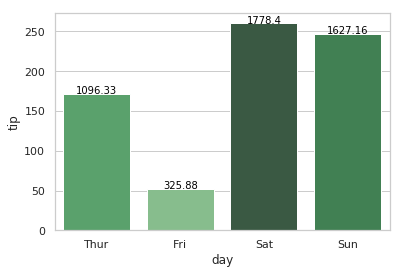

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = sns.load_dataset("tips")
groupedvalues=df.groupby('day').sum().reset_index()

pal = sns.color_palette("Greens_d", len(groupedvalues))
rank = groupedvalues["total_bill"].argsort().argsort() 
g=sns.barplot(x='day',y='tip',data=groupedvalues, palette=np.array(pal[::-1])[rank])

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")

plt.show()

In [99]:
df.head(), groupedvalues.head()

(   total_bill   tip     sex smoker  day    time  size
 0       16.99  1.01  Female     No  Sun  Dinner     2
 1       10.34  1.66    Male     No  Sun  Dinner     3
 2       21.01  3.50    Male     No  Sun  Dinner     3
 3       23.68  3.31    Male     No  Sun  Dinner     2
 4       24.59  3.61  Female     No  Sun  Dinner     4,
     day  total_bill     tip  size
 0  Thur     1096.33  171.83   152
 1   Fri      325.88   51.96    40
 2   Sat     1778.40  260.40   219
 3   Sun     1627.16  247.39   216)